In [5]:
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [7]:
x_train = sequence.pad_sequences(x_train, maxlen = 200)
x_test = sequence.pad_sequences(x_test, maxlen = 200)

In [8]:
model = Sequential()
model.add(Embedding(10000, 400))
model.add(LSTM(25))
model.add(Dropout(0.25))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 400)         4000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 25)                42600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 4,042,626
Trainable params: 4,042,626
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
hiytory = model.fit(x_train, y_train, validation_split = 0.1, batch_size = 32, epochs = 5)

Instructions for updating:
Use tf.cast instead.
Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 142s 6ms/step - loss: 0.4055 - acc: 0.8174 - val_loss: 0.3034 - val_acc: 0.8728
Epoch 2/5
22500/22500 [==============================] - 134s 6ms/step - loss: 0.2253 - acc: 0.9128 - val_loss: 0.2902 - val_acc: 0.8824
Epoch 3/5
22500/22500 [==============================] - 141s 6ms/step - loss: 0.1500 - acc: 0.9460 - val_loss: 0.3443 - val_acc: 0.8848
Epoch 4/5
22500/22500 [==============================] - 134s 6ms/step - loss: 0.1032 - acc: 0.9648 - val_loss: 0.3965 - val_acc: 0.8740
Epoch 5/5
22500/22500 [==============================] - 139s 6ms/step - loss: 0.0775 - acc: 0.9747 - val_loss: 0.4142 - val_acc: 0.8652


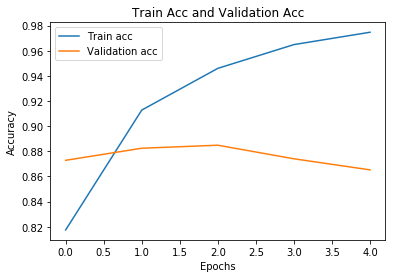

In [13]:
plt.plot(hiytory.history['acc'])
plt.plot(hiytory.history['val_acc'])
plt.title('Train Acc and Validation Acc')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train acc', 'Validation acc'])
plt.show()

# 看起來快要overfitting了...
## 接近87%